# Getting the Data

## Scraping with BeautifulSoup

First we'll download pages of URLs. Then we'll spider through those lists of URLs. See Scraping jupyter notebook.

# Bringing the data into Pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import statsmodels.api as sm
import re

In [2]:
df = pd.read_csv('movie_info_genre2011.csv')

In [3]:
df = df.drop_duplicates()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 1974
Data columns (total 7 columns):
genre          1975 non-null object
dtg            1975 non-null int64
mpaa           1975 non-null object
releasedate    1975 non-null object
budget         614 non-null float64
runtime        1926 non-null float64
title          1975 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 123.4+ KB


# Cleaning the Data

## Genre categories

In [5]:
df.genre.unique()

array(['Sci-Fi Fantasy', 'Sci-Fi Horror', 'Action', 'Action / Adventure',
       'Animation', 'Sci-Fi', 'Romance', 'Fantasy', 'Sci-Fi Action',
       'Family', 'Comedy', 'Action Comedy', 'Family Comedy', 'Thriller',
       'Drama', 'Western', 'Horror Comedy', 'Action Fantasy', 'Adventure',
       'Comedy / Drama', 'Horror', 'Crime Drama', 'Action Drama',
       'Musical', 'Foreign', 'Sports Drama', 'War Drama',
       'Sci-Fi Thriller', 'Music Drama', 'Romantic Comedy', 'Documentary',
       'Foreign / Action', 'Period Drama', 'Adventure Comedy',
       'Romantic Thriller', 'Historical Drama', 'Drama / Thriller',
       'Action Thriller', 'Horror Thriller', 'Crime', 'Crime Thriller',
       'Action / Crime', 'Crime Comedy', 'Foreign / Horror',
       'Sci-Fi Adventure', 'Family Adventure', 'Period Action',
       'Action Horror', 'War', 'Western Comedy', 'Fantasy Drama', 'IMAX',
       'Concert', 'Sports Comedy', 'Sci-Fi Comedy', 'Period Comedy',
       'Period Adventure', 'Comedy Thri

In [6]:
def comedy(s):
    if 'Comedy' in s:
        return 1
    else:
        return 0

def drama(s):
    if 'Drama' in s:
        return 1
    else:
        return 0

def animation(s):
    if 'Animation' in s:
        return 1
    else:
        return 0

def thriller(s):
    if 'Thriller' in s:
        return 1
    else:
        return 0 

def unknown(s):
    if 'Unknown' in s:
        return 1
    else:
        return 0

def action(s):
    if 'Action' in s:
        return 1
    else:
        return 0

def horror(s):
    if 'Horror' in s:
        return 1 
    else:
        return 0

def romance(s):
    if 'Romance' in s:
        return 1
    else:
        return 0

def fantasy(s):
    if 'Fantasy' in s:
        return 1
    else:
        return 0

def family(s):
    if 'Family' in s:
        return 1
    else:
        return 0

def sports(s):
    if 'Sports' in s:
        return 1
    else:
        return 0

def foreign(s):
    if 'Foreign' in s:
        return 1
    else:
        return 0

def music(s):
    if 'Music' in s:
        return 1
    elif 'Concert' in s:
        return 1
    else:
        return 0

def western(s):
    if 'Western' in s:
        return 1
    else:
        return 0

def crime(s):
    if 'Crime' in s:
        return 1
    else:
        return 0 
    
def sci_fi(s):
    if 'Sci-Fi' in s:
        return 1
    else:
        return 0

def war(s):
    if 'War' in s:
        return 1
    else:
        return 0
    
def documentary(s):
    if 'Documentary' in s:
        return 1
    else:
        return 0

In [7]:
df['genre_comedy'] = df['genre'].apply(comedy)
df['genre_drama'] = df['genre'].apply(drama)
df['genre_animation'] = df['genre'].apply(animation)
df['genre_thriller'] = df['genre'].apply(thriller)
df['genre_unknown'] = df['genre'].apply(unknown)
df['genre_action'] = df['genre'].apply(action)
df['genre_horror'] = df['genre'].apply(horror)
df['genre_romance'] = df['genre'].apply(romance)
df['genre_fantasy'] = df['genre'].apply(fantasy)
df['genre_family'] = df['genre'].apply(family)
df['genre_sports'] = df['genre'].apply(sports)
df['genre_foreign'] = df['genre'].apply(foreign)
df['genre_music'] = df['genre'].apply(music)
df['genre_western'] = df['genre'].apply(western)
df['genre_crime'] = df['genre'].apply(crime)
df['genre_sci_fi'] = df['genre'].apply(sci_fi)
df['genre_war'] = df['genre'].apply(war)
df['genre_documentary'] = df['genre'].apply(documentary)

In [8]:
df.head()

,genre,dtg,mpaa,releasedate,budget,runtime,title,genre_comedy,genre_drama,genre_animation,...,genre_fantasy,genre_family,genre_sports,genre_foreign,genre_music,genre_western,genre_crime,genre_sci_fi,genre_war,genre_documentary
0,Sci-Fi Fantasy,936662225,PG-13,2015-12-18 00:00:00,245000000.0,136.0,Star Wars: The Force Awakens,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,Sci-Fi Horror,652270625,PG-13,2015-06-12 00:00:00,150000000.0,124.0,Jurassic World,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Action,353007020,PG-13,2015-04-03 00:00:00,190000000.0,137.0,Furious 7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Action / Adventure,459005868,PG-13,2015-05-01 00:00:00,250000000.0,141.0,Avengers: Age of Ultron,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Animation,336045770,PG,2015-07-10 00:00:00,74000000.0,91.0,Minions,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(1975, 25)

## Release date

Based on the release date column, get the month in order to make season dummy variables.

In [10]:
import datetime as dt

month_array = [int(x.split('-')[1]) for x in list(df.releasedate)]
df['relmonth']=month_array

In [11]:
df['winter'] = df.relmonth.isin([12,1,2])

In [12]:
df['winter'] = df['winter'].astype(int)

In [13]:
df['spring'] = df.relmonth.isin([3,4,5]).astype(int)

In [14]:
df['summer'] = df.relmonth.isin([6,7,8]).astype(int)

In [15]:
del df['relmonth']

In [16]:
df['isitsummer'] = df.summer.isin([1]).astype(int)

In [17]:
df['isitspring'] = df.spring.isin([1]).astype(int)

In [18]:
df['isitwinter'] = df.winter.isin([1]).astype(int)

In [19]:
def label_season (row):
   if row['winter'] == 1 :
      return 'Winter'
   elif row['spring'] == 1 :
      return 'Spring'
   elif row['summer'] == 1 :
      return 'Summer'
   return 'Fall'

In [20]:
df["season"]=df.apply (lambda row: label_season (row),axis=1)

## MPAA ratings

Make categories: R, PG-13, PG (G is implied where all are false)

In [21]:
df['R_rated'] = df.mpaa.isin(["R"]).astype(int)

In [22]:
df['PG-13'] = df.mpaa.isin(["PG-13"]).astype(int)

In [23]:
# df['PG'] = df.mpaa.isin(["PG"]).astype(int) #legacy from before G was dropped

In [24]:
df.mpaa.unique()

array(['PG-13', 'PG', 'R', 'Unrated', 'G', 'NC-17', 'Not Yet Rated'], dtype=object)

In [25]:
a = ["R","PG-13","PG"]

In [26]:
df = df[df['mpaa'].isin(a)]

In [27]:
df.mpaa.unique()

array(['PG-13', 'PG', 'R'], dtype=object)

In [28]:
df.shape

(1335, 34)

# Make interaction terms

## Seasons

In [29]:
df['BSinteract'] = df['isitsummer'] * df['budget']

In [30]:
df['BSpinteract'] = df['isitspring'] * df['budget']

In [31]:
df['BWinteract'] = df['isitwinter'] * df['budget']

## Genres

In [32]:
genres = ['comedy','drama','animation','thriller','unknown','action','horror','romance','fantasy','family','sports','foreign','music','western','crime','sci_fi','war','documentary']

In [33]:
df.columns

Index(['genre', 'dtg', 'mpaa', 'releasedate', 'budget', 'runtime', 'title',
       'genre_comedy', 'genre_drama', 'genre_animation', 'genre_thriller',
       'genre_unknown', 'genre_action', 'genre_horror', 'genre_romance',
       'genre_fantasy', 'genre_family', 'genre_sports', 'genre_foreign',
       'genre_music', 'genre_western', 'genre_crime', 'genre_sci_fi',
       'genre_war', 'genre_documentary', 'winter', 'spring', 'summer',
       'isitsummer', 'isitspring', 'isitwinter', 'season', 'R_rated', 'PG-13',
       'BSinteract', 'BSpinteract', 'BWinteract'],
      dtype='object')

In [34]:
df.genre;

In [35]:
for genre in genres:
    df[(genre+'_interact')] = df[("genre_"+genre)] * df['budget']

In [36]:
df.shape

(1335, 55)

Lastly, we need an intercept column to help our OLS model from statsmodel extrapolate through the intercept. This is done automatically by scikit-learn's linear regression model.

In [37]:
df["intercept"]=1

# Here is the fruit of our efforts.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1974
Data columns (total 56 columns):
genre                   1335 non-null object
dtg                     1335 non-null int64
mpaa                    1335 non-null object
releasedate             1335 non-null object
budget                  600 non-null float64
runtime                 1318 non-null float64
title                   1335 non-null object
genre_comedy            1335 non-null int64
genre_drama             1335 non-null int64
genre_animation         1335 non-null int64
genre_thriller          1335 non-null int64
genre_unknown           1335 non-null int64
genre_action            1335 non-null int64
genre_horror            1335 non-null int64
genre_romance           1335 non-null int64
genre_fantasy           1335 non-null int64
genre_family            1335 non-null int64
genre_sports            1335 non-null int64
genre_foreign           1335 non-null int64
genre_music             1335 non-null int64
genre_

In [39]:
df.describe()

/Users/ANTARES/anaconda2/envs/snakes/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,dtg,budget,runtime,genre_comedy,genre_drama,genre_animation,genre_thriller,genre_unknown,genre_action,genre_horror,...,family_interact,sports_interact,foreign_interact,music_interact,western_interact,crime_interact,sci_fi_interact,war_interact,documentary_interact,intercept
count,1.335000e+03,6.000000e+02,1318.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.0,1335.000000,1335.000000,...,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,1335.0
mean,3.840274e+07,5.496167e+07,106.669196,0.247191,0.298876,0.044944,0.114607,0.0,0.144569,0.071161,...,1.291667e+06,2.800000e+05,5.533333e+04,6.725000e+05,6.683333e+05,6.851667e+05,8.342500e+06,3.691667e+05,3.133333e+04,1.0
std,7.274301e+07,5.430680e+07,16.336760,0.431540,0.457937,0.207258,0.318666,0.0,0.351798,0.257190,...,9.992147e+06,3.064951e+06,7.051716e+05,5.745419e+06,9.966304e+06,5.257531e+06,3.439150e+07,4.770086e+06,5.353153e+05,0.0
min,0.000000e+00,1.000000e+05,72.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,3.749660e+05,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
50%,7.597898e+06,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
75%,4.575668e+07,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
max,9.366622e+08,2.500000e+08,194.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.270000e+08,5.000000e+07,1.200000e+07,7.500000e+07,2.150000e+08,6.000000e+07,2.500000e+08,6.800000e+07,1.200000e+07,1.0


We anticipate this will be our main linear relationship... \$ IN \$ OUT

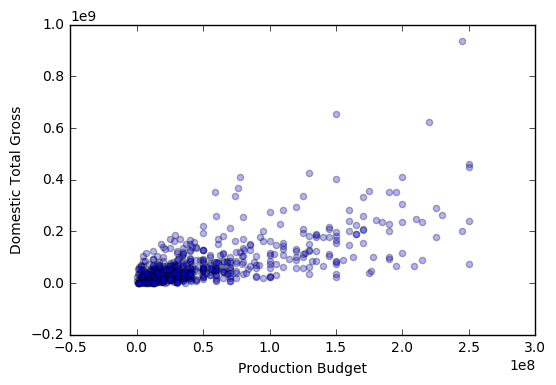

In [40]:
plt.scatter(df.budget,df.dtg, alpha=.3)
plt.xlabel("Production Budget")
plt.ylabel("Domestic Total Gross")

In [41]:
df.columns

Index(['genre', 'dtg', 'mpaa', 'releasedate', 'budget', 'runtime', 'title',
       'genre_comedy', 'genre_drama', 'genre_animation', 'genre_thriller',
       'genre_unknown', 'genre_action', 'genre_horror', 'genre_romance',
       'genre_fantasy', 'genre_family', 'genre_sports', 'genre_foreign',
       'genre_music', 'genre_western', 'genre_crime', 'genre_sci_fi',
       'genre_war', 'genre_documentary', 'winter', 'spring', 'summer',
       'isitsummer', 'isitspring', 'isitwinter', 'season', 'R_rated', 'PG-13',
       'BSinteract', 'BSpinteract', 'BWinteract', 'comedy_interact',
       'drama_interact', 'animation_interact', 'thriller_interact',
       'unknown_interact', 'action_interact', 'horror_interact',
       'romance_interact', 'fantasy_interact', 'family_interact',
       'sports_interact', 'foreign_interact', 'music_interact',
       'western_interact', 'crime_interact', 'sci_fi_interact', 'war_interact',
       'documentary_interact', 'intercept'],
      dtype='object')

We've made this as large as seems reasonable at this point. We could theoretically make interaction terms that multiply 3+ factors, but instead let's start pairing things down.

# Exploring the Data

season
Fall      [[Axes(0.125,0.125;0.775x0.775)]]
Spring    [[Axes(0.125,0.125;0.775x0.775)]]
Summer    [[Axes(0.125,0.125;0.775x0.775)]]
Winter    [[Axes(0.125,0.125;0.775x0.775)]]
dtype: object

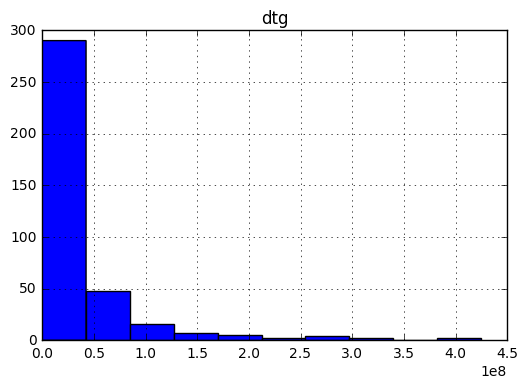

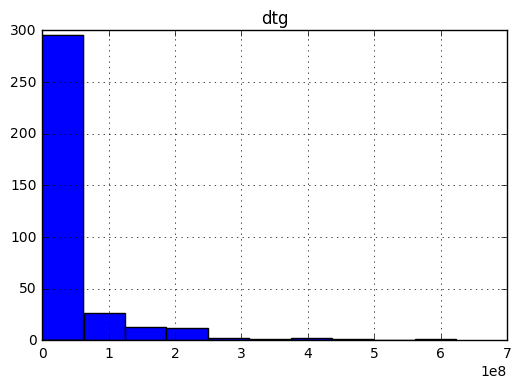

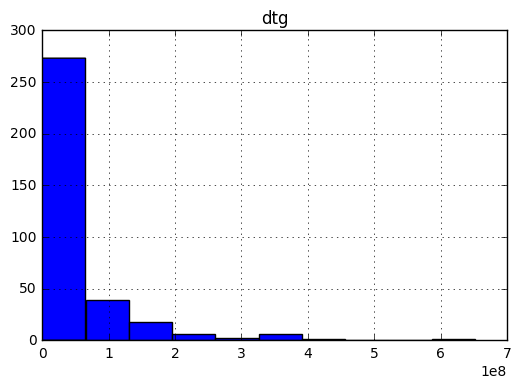

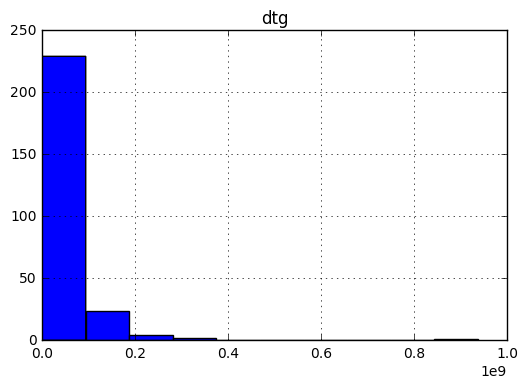

In [42]:
df.groupby('season').hist('dtg')

In [43]:
import seaborn as sns

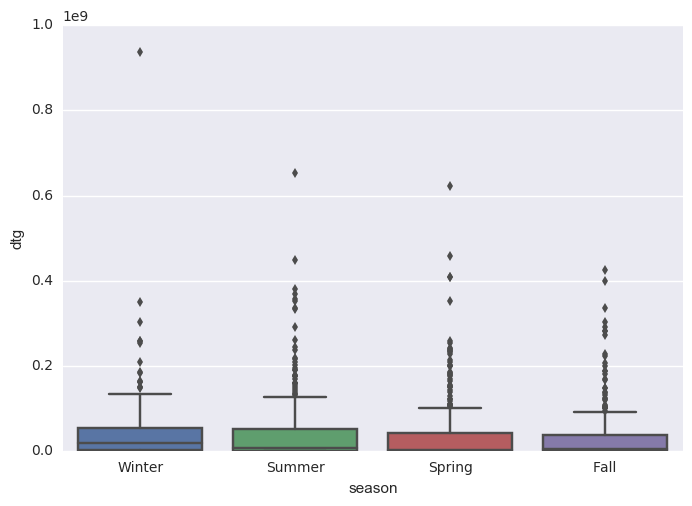

In [44]:
sns.boxplot(x="season", y="dtg", data=df);

In [45]:
def scatter_matrix(X):
    feature_count = len(X.columns)
    fig,ax = plt.subplots(ncols=feature_count,nrows=feature_count,figsize=(10*feature_count, 10*feature_count))

    for i,feature_i in enumerate(X):
        for j,feature_j in enumerate(X):
            ax[i][j].scatter(X[feature_i],X[feature_j])
            ax[i][j].set_xlabel('Feature ' + str(feature_j))
            ax[i][j].set_ylabel('Feature ' + str(feature_i))

In [46]:
# scatter_matrix(df)

# Let's make a linear model

We'll only use the numeric data and drop the rest for this part.

In [47]:
df_numonly = df._get_numeric_data()

In [48]:
df_numonly.shape

(1335, 51)

In [49]:
df_numonly.head()

,dtg,budget,runtime,genre_comedy,genre_drama,genre_animation,genre_thriller,genre_unknown,genre_action,genre_horror,...,family_interact,sports_interact,foreign_interact,music_interact,western_interact,crime_interact,sci_fi_interact,war_interact,documentary_interact,intercept
0,936662225,245000000.0,136.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,245000000.0,0.0,0.0,1
1,652270625,150000000.0,124.0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,150000000.0,0.0,0.0,1
2,353007020,190000000.0,137.0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,459005868,250000000.0,141.0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,336045770,74000000.0,91.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


We know we have a lot of missingness. Let's remember to drop rows with missing values each time we build a model in SKLearn. In the meantime, we'll drop all missing here in order to run OLS in statsmodel.

In [50]:
df_no_missing = df_numonly.dropna()

In [51]:
df_no_missing.shape

(596, 51)

In [52]:
X, y = df_no_missing.drop(['dtg'], axis=1),df_no_missing['dtg']

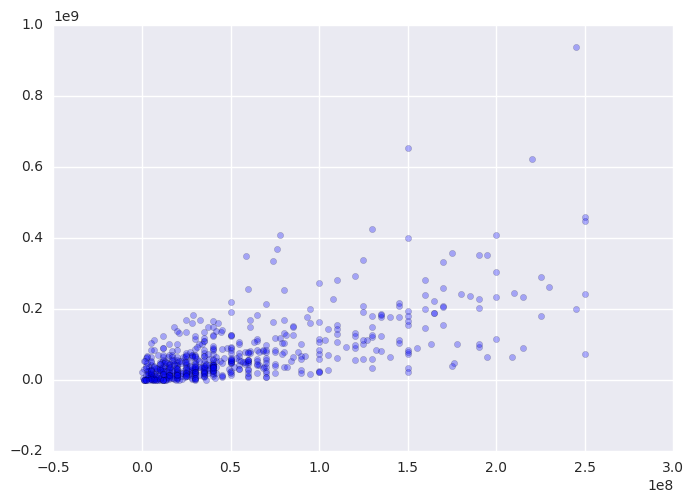

In [53]:
plt.scatter(df_no_missing.budget,df_no_missing.dtg, alpha=.3)

It looks like there is a linear relationship between production budget and domestic total gross

In [54]:
model_onevar = sm.OLS(y, X[["intercept","budget"]])
results = model_onevar.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtg   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     467.5
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           6.49e-77
Time:                        22:42:42   Log-Likelihood:                -11596.
No. Observations:                 596   AIC:                         2.320e+04
Df Residuals:                     594   BIC:                         2.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
intercept   1.448e+07   3.99e+06      3.628      0.000      6.64e+06  2.23e+07
budget         1.1135      0.052     21.621      0.000         1.012     1.215
==============================================================================
Omnibus:                      429.242   Durbin-Watson:                   1.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10753.122
Skew:                           2.849   Prob(JB):                         0.00
Kurtosis:                      23.014   Cond. No.                     1.10e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Yep. What about runtime?

In [58]:
model = sm.OLS(y, X[["intercept", "runtime","budget"]])

In [59]:
results = model.fit()

In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     242.7
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           9.63e-78
Time:                        22:43:18   Log-Likelihood:                -11591.
No. Observations:                 596   AIC:                         2.319e+04
Df Residuals:                     593   BIC:                         2.320e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
intercept  -4.377e+07   1.84e+07     -2.379      0.018     -7.99e+07 -7.64e+06
runtime     5.609e+05   1.73e+05      3.242      0.001      2.21e+05  9.01e+05
budget         1.0503      0.055     19.206      0.000         0.943     1.158
==============================================================================
Omnibus:                      430.577   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10987.075
Skew:                           2.855   Prob(JB):                         0.00
Kurtosis:                      23.244   Cond. No.                     5.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This looks helpful. Our R^2 adjusted term has improved, and our features show significance. What about the interaction between summer and budget?

In [61]:
model_summer = sm.OLS(y, X[["intercept","budget","runtime","isitsummer","BSinteract"]])
results = model_summer.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtg   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     122.1
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           7.05e-76
Time:                        22:43:25   Log-Likelihood:                -11590.
No. Observations:                 596   AIC:                         2.319e+04
Df Residuals:                     591   BIC:                         2.321e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
intercept  -4.904e+07   1.87e+07     -2.622      0.009     -8.58e+07 -1.23e+07
budget         1.0885      0.066     16.611      0.000         0.960     1.217
runtime     5.756e+05   1.73e+05      3.322      0.001      2.35e+05  9.16e+05
isitsummer  1.396e+07   9.01e+06      1.549      0.122     -3.74e+06  3.17e+07
BSinteract    -0.1309      0.109     -1.204      0.229        -0.344     0.083
==============================================================================
Omnibus:                      425.743   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10651.929
Skew:                           2.814   Prob(JB):                         0.00
Kurtosis:                      22.931   Cond. No.                     5.59e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Probably not, based on the p-values.

We can come back to OLS linear regression to further probe the model suggested by scikit-learn.

# Train a scikit-learn model

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation, linear_model, ensemble, tree

We need a new dataframe since by default all features will be included in the model, and we currently have some variables that are multicollinear (i.e. measure the same thing).

In [63]:
df_skall = df_numonly.copy(deep=True)

In [64]:
df_skall.columns

Index(['dtg', 'budget', 'runtime', 'genre_comedy', 'genre_drama',
       'genre_animation', 'genre_thriller', 'genre_unknown', 'genre_action',
       'genre_horror', 'genre_romance', 'genre_fantasy', 'genre_family',
       'genre_sports', 'genre_foreign', 'genre_music', 'genre_western',
       'genre_crime', 'genre_sci_fi', 'genre_war', 'genre_documentary',
       'winter', 'spring', 'summer', 'isitsummer', 'isitspring', 'isitwinter',
       'R_rated', 'PG-13', 'BSinteract', 'BSpinteract', 'BWinteract',
       'comedy_interact', 'drama_interact', 'animation_interact',
       'thriller_interact', 'unknown_interact', 'action_interact',
       'horror_interact', 'romance_interact', 'fantasy_interact',
       'family_interact', 'sports_interact', 'foreign_interact',
       'music_interact', 'western_interact', 'crime_interact',
       'sci_fi_interact', 'war_interact', 'documentary_interact', 'intercept'],
      dtype='object')

In [65]:
del df_skall["isitsummer"], df_skall["isitspring"], df_skall["isitwinter"]

In [66]:
df_skall = df_skall.dropna()

In [67]:
df_skall.columns

Index(['dtg', 'budget', 'runtime', 'genre_comedy', 'genre_drama',
       'genre_animation', 'genre_thriller', 'genre_unknown', 'genre_action',
       'genre_horror', 'genre_romance', 'genre_fantasy', 'genre_family',
       'genre_sports', 'genre_foreign', 'genre_music', 'genre_western',
       'genre_crime', 'genre_sci_fi', 'genre_war', 'genre_documentary',
       'winter', 'spring', 'summer', 'R_rated', 'PG-13', 'BSinteract',
       'BSpinteract', 'BWinteract', 'comedy_interact', 'drama_interact',
       'animation_interact', 'thriller_interact', 'unknown_interact',
       'action_interact', 'horror_interact', 'romance_interact',
       'fantasy_interact', 'family_interact', 'sports_interact',
       'foreign_interact', 'music_interact', 'western_interact',
       'crime_interact', 'sci_fi_interact', 'war_interact',
       'documentary_interact', 'intercept'],
      dtype='object')

In [68]:
X, y = df_skall.drop(['dtg'], axis=1),df_no_missing['dtg']

In [69]:
Xtrain, Xtest, ytrain, ytest = cross_validation.train_test_split(X, y, test_size=0.3)
Xtrain.describe()

,budget,runtime,genre_comedy,genre_drama,genre_animation,genre_thriller,genre_unknown,genre_action,genre_horror,genre_romance,...,family_interact,sports_interact,foreign_interact,music_interact,western_interact,crime_interact,sci_fi_interact,war_interact,documentary_interact,intercept
count,4.170000e+02,417.000000,417.000000,417.000000,417.000000,417.000000,417.0,417.000000,417.000000,417.000000,...,4.170000e+02,4.170000e+02,4.170000e+02,4.170000e+02,4.170000e+02,4.170000e+02,4.170000e+02,4.170000e+02,4.170000e+02,417.0
mean,5.427914e+07,109.908873,0.280576,0.230216,0.059952,0.117506,0.0,0.230216,0.081535,0.014388,...,1.594724e+06,3.429257e+05,6.330935e+04,6.834532e+05,7.601918e+05,8.011990e+05,7.394484e+06,3.213429e+05,1.630695e+04,1.0
std,5.462148e+07,16.819070,0.449820,0.421477,0.237683,0.322409,0.0,0.421477,0.273983,0.119229,...,1.070210e+07,3.466863e+06,7.779853e+05,5.847052e+06,1.160115e+07,5.816160e+06,3.250133e+07,4.634979e+06,2.600347e+05,0.0
min,1.000000e+05,78.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,1.500000e+07,97.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
50%,3.500000e+07,108.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
75%,7.000000e+07,120.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
max,2.500000e+08,194.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.270000e+08,5.000000e+07,1.200000e+07,7.500000e+07,2.150000e+08,6.000000e+07,2.500000e+08,6.800000e+07,5.000000e+06,1.0


In [70]:
df_skall.head()

,dtg,budget,runtime,genre_comedy,genre_drama,genre_animation,genre_thriller,genre_unknown,genre_action,genre_horror,...,family_interact,sports_interact,foreign_interact,music_interact,western_interact,crime_interact,sci_fi_interact,war_interact,documentary_interact,intercept
0,936662225,245000000.0,136.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,245000000.0,0.0,0.0,1
1,652270625,150000000.0,124.0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,150000000.0,0.0,0.0,1
2,353007020,190000000.0,137.0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,459005868,250000000.0,141.0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,336045770,74000000.0,91.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [71]:
len(Xtrain), len(ytrain), len(Xtest), len(ytest)

(417, 417, 179, 179)

In [72]:
model = LinearRegression(fit_intercept=True)
model.fit(Xtrain, ytrain);

In [73]:
print("Score: " + str(model.score(Xtest,ytest)))

Score: 0.100269302545


We clearly have too many features now!!

# Look at all the models... what are they doing?

In [74]:
models = {}
models['lin_reg'] = linear_model.LinearRegression()
models['ridge'] = linear_model.Ridge()
models['lasso'] = linear_model.Lasso(alpha=.6)
models['elasticnet'] = linear_model.ElasticNet()

In [75]:
for name,model in models.items():
    model.fit(Xtrain,ytrain)
    print('Model: '+name)
    print("Score: " + str(model.score(Xtest,ytest)))
    sorted_features = sorted(zip(Xtrain.columns,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

Model: ridge
Score: 0.118933524287
('genre_romance', -64798941.130779609)
('winter', 33318426.037756737)
('genre_action', -23697814.150430638)
('summer', 17843551.761556804)
('genre_animation', 15873259.07835531)
('genre_thriller', -11987303.764181435)
('genre_comedy', 11558828.230992982)
('genre_drama', -9305167.1047257576)
('genre_western', 8592637.6529786792)
('genre_sci_fi', 7267158.6067869822)
('genre_fantasy', 6616403.6533881174)
('spring', 6275407.3180099893)
('genre_horror', 6099708.0535616688)
('genre_foreign', -4860686.8407850815)
('genre_music', -4095290.7339669066)
('genre_documentary', 3447753.172851854)
('genre_family', 3010222.769620996)
('R_rated', -1962612.8012835043)
('PG-13', -1300587.4135609532)
('runtime', 1273266.0758412317)
('genre_crime', -1009230.0907894016)
('genre_sports', -71431.046181335289)
('genre_war', 15371.275043589876)
('foreign_interact', -5.5699060190632608)
('documentary_interact', -5.0367210600536252)
('romance_interact', 1.7807236429848889)
('bud

/Users/ANTARES/anaconda2/envs/snakes/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


# Let's choose a better alpha for Lasso?

In [76]:
def plot_overfit(X,y,model_obj,param_ranges,param_static=None): 
    for parameter,parameter_range in param_ranges.items():
        avg_train_score, avg_test_score = [],[]
        std_train_score, std_test_score = [],[]
        
        for param_val in parameter_range:
            param = {parameter:param_val}
            if param_static:
                param.update(param_static)
                
            model = model_obj(**param)
            
            train_scores,test_scores = [],[]
            for i in range(20):
                Xtrain,Xtest,ytrain,ytest = cross_validation.train_test_split(X,y,test_size = .3)
                model.fit(Xtrain,ytrain)
                
                train_scores.append(model.score(Xtrain,ytrain))
                test_scores.append(model.score(Xtest,ytest))
            
            avg_train_score.append(np.mean(train_scores))
            avg_test_score.append(np.mean(test_scores))
            
            std_train_score.append(np.std(train_scores))
            std_test_score.append(np.std(test_scores))
            
        fig,ax = plt.subplots()
        ax.errorbar(parameter_range,avg_train_score,yerr=std_train_score,label='training score')
        ax.errorbar(parameter_range,avg_test_score,yerr=std_test_score,label='testing score')
        
        ax.set_xlabel(parameter)
        ax.set_ylabel('score')
        ax.legend(loc=0)

In [77]:
df_no_missing.shape

(596, 51)

/Users/ANTARES/anaconda2/envs/snakes/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


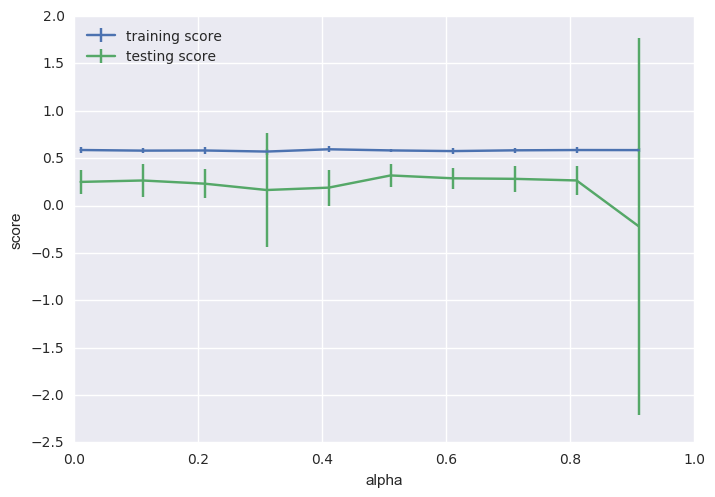

In [79]:
plot_overfit(X,y,linear_model.Lasso,{'alpha':np.arange(.01,1,.1)})

It's hard to say where our "peak" is in the testing score, but alpha = 0.51 is probably our best bet in this case.

In [80]:
print("Name: Lasso")
model = linear_model.Lasso(alpha=.51)
model.fit(Xtrain,ytrain)
print("Score: " + str(model.score(Xtest,ytest)))
#sorted_features = sorted(zip(Xtrain.columns,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
#print(sorted_features)

Name: Lasso
Score: 0.100003486901


/Users/ANTARES/anaconda2/envs/snakes/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


Ok, it's kind of the same as previously. But our scores in the .10-.20 range are a far cry from the earlier simple OLS model with the R^2 in the .40-.50 range. Let's trim back some features. To do this, let's feed the complete model into OLS and see the confidence intervals that emerge.

## Revisit OLS to drop non-significant features

In [81]:
# X, y = df_skall.drop(['dtg'], axis=1),df_no_missing['dtg'] #run only if not already in memory

In [82]:
model_skall = sm.OLS(y, X)
results = model_skall.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtg   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     15.44
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           2.45e-70
Time:                        22:46:50   Log-Likelihood:                -11530.
No. Observations:                 596   AIC:                         2.315e+04
Df Residuals:                     551   BIC:                         2.335e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
budget                   0.5268      0.182      2.888      0.004         0.169     0.885
runtime                1.26e+06   2.14e+05      5.892      0.000       8.4e+05  1.68e+06
genre_comedy          1.052e+07    1.2e+07      0.875      0.382     -1.31e+07  3.42e+07
genre_drama          -1.084e+07   1.23e+07     -0.879      0.380     -3.51e+07  1.34e+07
genre_animation       2.691e+07   2.62e+07      1.025      0.306     -2.46e+07  7.85e+07
genre_thriller       -2.208e+07    1.5e+07     -1.475      0.141     -5.15e+07  7.32e+06
genre_unknown           -4.2129      1.524     -2.764      0.006        -7.207    -1.218
genre_action         -3.752e+07   1.26e+07     -2.978      0.003     -6.23e+07 -1.28e+07
genre_horror          2.588e+06   1.62e+07      0.160      0.873     -2.93e+07  3.44e+07
genre_romance         -8.37e+07   3.61e+07     -2.321      0.021     -1.55e+08 -1.29e+07
genre_fantasy        -1.661e+08   3.35e+07     -4.961      0.000     -2.32e+08    -1e+08
genre_family          4.822e+06   3.91e+07      0.123      0.902      -7.2e+07  8.16e+07
genre_sports         -2.387e+04   6.59e+07     -0.000      1.000      -1.3e+08  1.29e+08
genre_foreign        -3.487e+07   1.13e+08     -0.309      0.757     -2.56e+08  1.87e+08
genre_music          -1.784e+07   3.49e+07     -0.512      0.609     -8.63e+07  5.07e+07
genre_western        -2.341e+07   4.38e+07     -0.534      0.593      -1.1e+08  6.27e+07
genre_crime          -2.778e+06   3.32e+07     -0.084      0.933     -6.81e+07  6.25e+07
genre_sci_fi          2.295e+06   1.72e+07      0.133      0.894     -3.15e+07  3.61e+07
genre_war            -3.014e+07   9.89e+07     -0.305      0.761     -2.24e+08  1.64e+08
genre_documentary    -9.542e+06   6.68e+07     -0.143      0.886     -1.41e+08  1.22e+08
winter                2.984e+06   1.19e+07      0.251      0.802     -2.04e+07  2.63e+07
spring               -3.116e+06   1.09e+07     -0.286      0.775     -2.45e+07  1.83e+07
summer                1.576e+07   1.05e+07      1.500      0.134     -4.88e+06  3.64e+07
R_rated               5.575e+06   1.19e+07      0.470      0.639     -1.77e+07  2.89e+07
PG-13                 8.985e+06   1.16e+07      0.775      0.439     -1.38e+07  3.18e+07
BSinteract              -0.1710      0.149     -1.144      0.253        -0.465     0.123
BSpinteract              0.0275      0.148      0.186      0.853        -0.263     0.318
BWinteract               0.0079      0.200      0.040      0.968        -0.384     0.400
comedy_interact         -0.0309      0.202     -0.153      0.879        -0.428     0.366
drama_interact          -0.2964      0.224     -1.321      0.187        -0.737     0.144
animation_interact       0.5248      0.252      2.083      0.038         0.030     1.020
thriller_interact        0.4626      0.245      1.885    

R^2 went up compared to our very simple OLS model, but we have too many features, most of them are not measurably improving the model. Based on this analysis, the genres I will include are action, romance, and fantasy, as well as their three interaction terms.

In [103]:
df_final = df_skall.copy(deep=True)

In [114]:
del df_final["foreign_interact"], df_final["drama_interact"], df_final["animation_interact"]

In [105]:
del df_final["genre_comedy"], df_final["genre_drama"], df_final["genre_animation"], df_final["genre_sports"], df_final["genre_war"]

In [112]:
del df_final["thriller_interact"], df_final["crime_interact"], df_final["sports_interact"], df_final["documentary_interact"]

In [106]:
del df_final["genre_western"], df_final["western_interact"], df_final["comedy_interact"], df_final["unknown_interact"]

In [107]:
del df_final["genre_thriller"], df_final["genre_sci_fi"], df_final["genre_family"], df_final["genre_foreign"]

In [108]:
del df_final["genre_horror"], df_final["horror_interact"], df_final["sci_fi_interact"], df_final["war_interact"], df_final["music_interact"]

In [110]:
del df_final["genre_unknown"], df_final["genre_music"], df_final["genre_crime"], df_final["genre_documentary"], df_final["family_interact"]

In [115]:
df_final.columns

Index(['dtg', 'budget', 'runtime', 'genre_action', 'genre_romance',
       'genre_fantasy', 'winter', 'spring', 'summer', 'R_rated', 'PG-13',
       'BSinteract', 'BSpinteract', 'BWinteract', 'action_interact',
       'romance_interact', 'fantasy_interact', 'intercept'],
      dtype='object')

In [116]:
X, y = df_final.drop(['dtg'], axis=1),df_final['dtg']

In [117]:
model_skall = sm.OLS(y, X)
results = model_skall.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtg   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     37.61
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           8.56e-79
Time:                        22:57:29   Log-Likelihood:                -11557.
No. Observations:                 596   AIC:                         2.315e+04
Df Residuals:                     579   BIC:                         2.322e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
budget               0.9598      0.134      7.170      0.000         0.697     1.223
runtime           6.335e+05    1.8e+05      3.516      0.000       2.8e+05  9.87e+05
genre_action     -3.034e+07    1.1e+07     -2.748      0.006      -5.2e+07 -8.65e+06
genre_romance    -4.998e+07   3.48e+07     -1.437      0.151     -1.18e+08  1.83e+07
genre_fantasy    -1.773e+08   3.28e+07     -5.412      0.000     -2.42e+08 -1.13e+08
winter            6.138e+06   1.18e+07      0.518      0.605     -1.71e+07  2.94e+07
spring            1.879e+06   1.06e+07      0.178      0.859     -1.88e+07  2.26e+07
summer            1.512e+07   1.04e+07      1.448      0.148     -5.39e+06  3.56e+07
R_rated          -1.039e+07   8.95e+06     -1.161      0.246      -2.8e+07  7.18e+06
PG-13            -1.214e+07   8.67e+06     -1.400      0.162     -2.92e+07  4.89e+06
BSinteract          -0.1957      0.147     -1.328      0.185        -0.485     0.094
BSpinteract         -0.1287      0.145     -0.888      0.375        -0.413     0.156
BWinteract          -0.1889      0.192     -0.982      0.327        -0.567     0.189
action_interact      0.3791      0.119      3.176      0.002         0.145     0.613
romance_interact     1.8281      0.587      3.113      0.002         0.675     2.981
fantasy_interact     2.0136      0.299      6.724      0.000         1.425     2.602
intercept         -3.79e+07   1.99e+07     -1.907      0.057     -7.69e+07  1.14e+06
==============================================================================
Omnibus:                      318.993   Durbin-Watson:                   1.472
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4018.182
Skew:                           2.074   Prob(JB):                         0.00
Kurtosis:                      15.025   Cond. No.                     1.27e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can also drop the budget/season interaction terms

In [118]:
del df_final["BSpinteract"], df_final["BSinteract"], df_final["BWinteract"]

In [119]:
X, y = df_final.drop(['dtg'], axis=1),df_final['dtg']
model_final = sm.OLS(y, X)
results = model_final.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtg   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     46.23
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           7.35e-81
Time:                        22:59:50   Log-Likelihood:                -11558.
No. Observations:                 596   AIC:                         2.314e+04
Df Residuals:                     582   BIC:                         2.321e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
budget               0.8303      0.078     10.641      0.000         0.677     0.984
runtime            6.35e+05   1.78e+05      3.568      0.000      2.85e+05  9.85e+05
genre_action     -2.983e+07   1.09e+07     -2.725      0.007     -5.13e+07 -8.33e+06
genre_romance    -5.163e+07   3.47e+07     -1.489      0.137      -1.2e+08  1.65e+07
genre_fantasy    -1.745e+08   3.24e+07     -5.391      0.000     -2.38e+08 -1.11e+08
winter           -2.396e+06   7.72e+06     -0.310      0.756     -1.76e+07  1.28e+07
spring           -3.677e+06   7.51e+06     -0.489      0.625     -1.84e+07  1.11e+07
summer            5.509e+06   7.44e+06      0.740      0.460     -9.11e+06  2.01e+07
R_rated          -1.141e+07   8.84e+06     -1.290      0.197     -2.88e+07  5.96e+06
PG-13            -1.319e+07    8.6e+06     -1.534      0.126     -3.01e+07   3.7e+06
action_interact      0.3657      0.117      3.136      0.002         0.137     0.595
romance_interact     1.9197      0.581      3.304      0.001         0.779     3.061
fantasy_interact     1.9886      0.291      6.839      0.000         1.417     2.560
intercept        -3.144e+07   1.91e+07     -1.646      0.100     -6.89e+07  6.08e+06
==============================================================================
Omnibus:                      314.276   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3736.263
Skew:                           2.054   Prob(JB):                         0.00
Kurtosis:                      14.557   Cond. No.                     1.16e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Actually I thought this would be final, but let's get rid of the seasons. And I also have a new hypothesis: runtime and budget may interact as well.

In [122]:
df_noseasons = df_final.copy(deep=True)

In [123]:
del df_noseasons["winter"], df_noseasons["summer"], df_noseasons["spring"]

In [124]:
X, y = df_noseasons.drop(['dtg'], axis=1),df_noseasons['dtg']
model_final2 = sm.OLS(y, X)
results = model_final2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtg   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     60.05
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           3.96e-83
Time:                        23:07:04   Log-Likelihood:                -11559.
No. Observations:                 596   AIC:                         2.314e+04
Df Residuals:                     585   BIC:                         2.319e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
budget               0.8269      0.078     10.662      0.000         0.675     0.979
runtime            6.24e+05   1.77e+05      3.528      0.000      2.77e+05  9.71e+05
genre_action     -3.058e+07   1.08e+07     -2.821      0.005     -5.19e+07 -9.29e+06
genre_romance    -5.234e+07   3.45e+07     -1.516      0.130      -1.2e+08  1.55e+07
genre_fantasy    -1.732e+08   3.23e+07     -5.363      0.000     -2.37e+08  -1.1e+08
R_rated          -1.139e+07   8.83e+06     -1.290      0.197     -2.87e+07  5.95e+06
PG-13            -1.396e+07   8.55e+06     -1.632      0.103     -3.08e+07  2.84e+06
action_interact      0.3842      0.115      3.337      0.001         0.158     0.610
romance_interact     1.9286      0.577      3.344      0.001         0.796     3.061
fantasy_interact     1.9724      0.290      6.803      0.000         1.403     2.542
intercept        -2.991e+07   1.83e+07     -1.633      0.103     -6.59e+07  6.06e+06
==============================================================================
Omnibus:                      317.579   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3863.437
Skew:                           2.075   Prob(JB):                         0.00
Kurtosis:                      14.762   Cond. No.                     1.15e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

And I want to get rid of MPAA ratings now, too.

In [125]:
df_nompaa = df_noseasons.copy(deep=True)

In [126]:
del df_nompaa["R_rated"], df_nompaa["PG-13"]

In [127]:
X, y = df_nompaa.drop(['dtg'], axis=1),df_nompaa['dtg']
model_final3 = sm.OLS(y, X)
results = model_final3.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtg   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     74.64
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           1.98e-84
Time:                        23:09:45   Log-Likelihood:                -11560.
No. Observations:                 596   AIC:                         2.314e+04
Df Residuals:                     587   BIC:                         2.318e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
budget               0.8639      0.071     12.111      0.000         0.724     1.004
runtime           5.438e+05   1.69e+05      3.219      0.001      2.12e+05  8.76e+05
genre_action     -3.182e+07   1.08e+07     -2.950      0.003      -5.3e+07 -1.06e+07
genre_romance    -5.247e+07   3.44e+07     -1.525      0.128      -1.2e+08  1.51e+07
genre_fantasy    -1.733e+08   3.23e+07     -5.370      0.000     -2.37e+08  -1.1e+08
action_interact      0.3502      0.113      3.095      0.002         0.128     0.572
romance_interact     1.8756      0.576      3.258      0.001         0.745     3.006
fantasy_interact     1.9662      0.290      6.783      0.000         1.397     2.536
intercept        -3.271e+07   1.82e+07     -1.795      0.073     -6.85e+07  3.08e+06
==============================================================================
Omnibus:                      310.563   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3608.465
Skew:                           2.030   Prob(JB):                         0.00
Kurtosis:                      14.350   Cond. No.                     1.15e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

And without romance?

In [128]:
df_noromance = df_nompaa.copy(deep=True)

In [129]:
del df_noromance["genre_romance"]

In [130]:
X, y = df_noromance.drop(['dtg'], axis=1),df_noromance['dtg']
model_final4 = sm.OLS(y, X)
results = model_final4.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtg   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     84.78
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           6.53e-85
Time:                        23:11:22   Log-Likelihood:                -11562.
No. Observations:                 596   AIC:                         2.314e+04
Df Residuals:                     588   BIC:                         2.317e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
budget               0.8761      0.071     12.344      0.000         0.737     1.015
runtime           5.077e+05   1.67e+05      3.032      0.003      1.79e+05  8.37e+05
genre_action     -3.123e+07   1.08e+07     -2.894      0.004     -5.24e+07    -1e+07
genre_fantasy    -1.726e+08   3.23e+07     -5.342      0.000     -2.36e+08 -1.09e+08
action_interact      0.3443      0.113      3.041      0.002         0.122     0.567
romance_interact     1.1996      0.368      3.260      0.001         0.477     1.922
fantasy_interact     1.9564      0.290      6.743      0.000         1.387     2.526
intercept        -2.974e+07   1.81e+07     -1.640      0.102     -6.54e+07  5.88e+06
==============================================================================
Omnibus:                      308.439   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3551.927
Skew:                           2.015   Prob(JB):                         0.00
Kurtosis:                      14.260   Cond. No.                     1.07e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ah yes, we're done here. Let's see it in Scikit-learn.

In [131]:
Xtrain, Xtest, ytrain, ytest = cross_validation.train_test_split(X, y, test_size=0.3)
Xtrain.describe()

,budget,runtime,genre_action,genre_fantasy,action_interact,romance_interact,fantasy_interact,intercept
count,4.170000e+02,417.000000,417.000000,417.000000,4.170000e+02,4.170000e+02,4.170000e+02,417.0
mean,5.491535e+07,110.501199,0.230216,0.028777,2.023717e+07,7.218225e+05,2.769784e+06,1.0
std,5.495549e+07,17.689241,0.421477,0.167380,4.738969e+07,6.819749e+06,1.940732e+07,0.0
min,1.000000e+05,81.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,1.700000e+07,97.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
50%,3.500000e+07,109.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
75%,7.000000e+07,120.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
max,2.500000e+08,194.000000,1.000000,1.000000,2.500000e+08,1.200000e+08,2.450000e+08,1.0


In [132]:
models = {}
models['lin_reg'] = linear_model.LinearRegression()
models['ridge'] = linear_model.Ridge()
models['lasso'] = linear_model.Lasso(alpha=.51)
models['elasticnet'] = linear_model.ElasticNet()

In [133]:
for name,model in models.items():
    model.fit(Xtrain,ytrain)
    print('Model: '+name)
    print("Score: " + str(model.score(Xtest,ytest)))
    sorted_features = sorted(zip(Xtrain.columns,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

Model: ridge
Score: 0.394054142119
('genre_fantasy', -132746961.49481551)
('genre_action', -33786522.338569209)
('runtime', 446580.57463981857)
('fantasy_interact', 1.9878859444358521)
('romance_interact', 1.1254800538813814)
('budget', 0.77129764710999293)
('action_interact', 0.54286216747945981)
('intercept', 0.0)

Model: elasticnet
Score: 0.380083608638
('genre_action', -3609177.1269089384)
('genre_fantasy', -2786861.0832726387)
('runtime', 509820.23919664143)
('romance_interact', 1.1474248109440193)
('fantasy_interact', 1.0279119167790711)
('budget', 0.83956261428754819)
('action_interact', 0.28936827481556754)
('intercept', 0.0)

Model: lasso
Score: 0.395534879362
('genre_fantasy', -170099549.13785809)
('genre_action', -35910506.910635322)
('runtime', 437969.7495635181)
('fantasy_interact', 2.2607537892337293)
('romance_interact', 1.1222722429306928)
('budget', 0.76151892816297451)
('action_interact', 0.56235356425125116)
('intercept', 0.0)

Model: lin_reg
Score: 0.395534879877
('

# Conclusions

If we had a median budget, what's our best release season?

In [121]:
df_final.budget.median()

35000000.0

# Misc stuff below

In [50]:
#to do:

#hist of release date -- clustering around holidays? gives justification for var choices re: season or issummer
#logos from top movies in each season. ANOVA by season
#linear graph with CI
#slide that shows method as snowball sampling-- scraped 5 years yields x, then drop nans, outliers gives y etc

#inspect outliers
col = df['runtime']
col[np.abs(col) > 700]

381    729.0
Name: runtime, dtype: float64

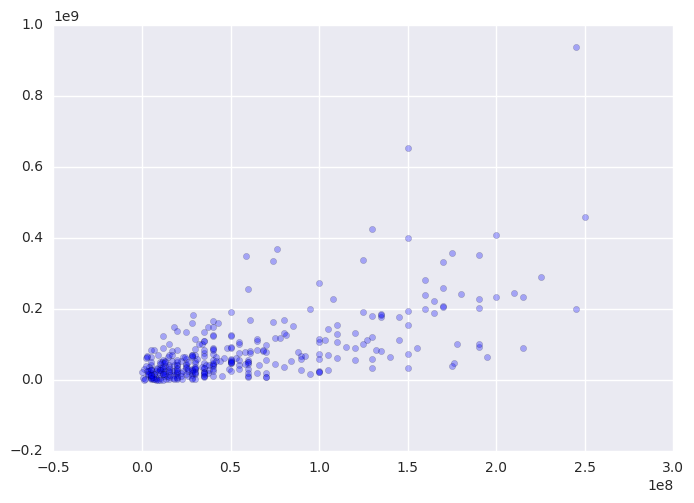

In [108]:
plt.scatter(df_no_missing.budget,df_no_missing.dtg, alpha=.3)

/Users/ANTARES/anaconda2/envs/snakes/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119466550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a0feb38>]], dtype=object)

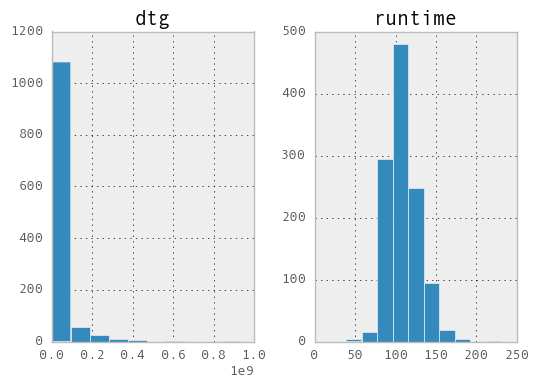

In [61]:
pd.options.display.mpl_style = 'default'
df_clean.hist()

mpaa
G                [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
NC-17            [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
Not Yet Rated    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
PG               [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
PG-13            [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
R                [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
Unrated          [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
dtype: object

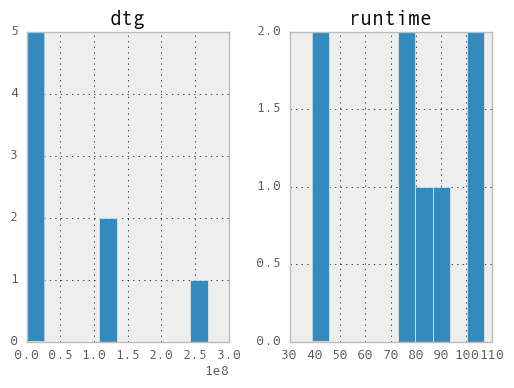

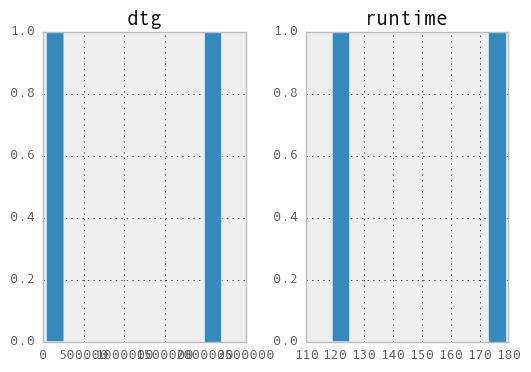

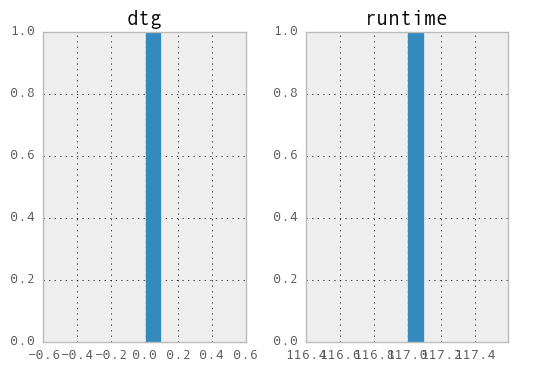

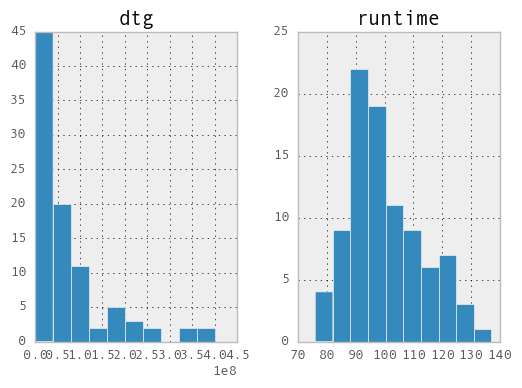

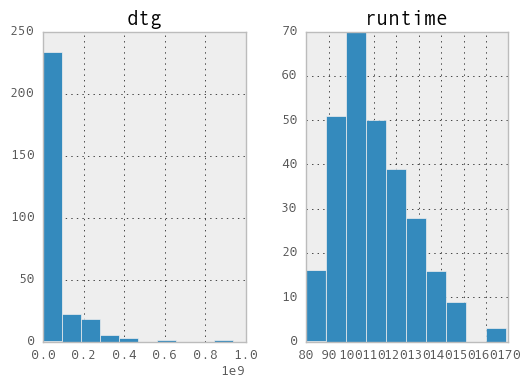

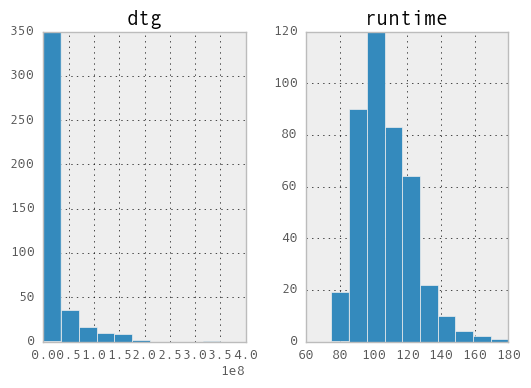

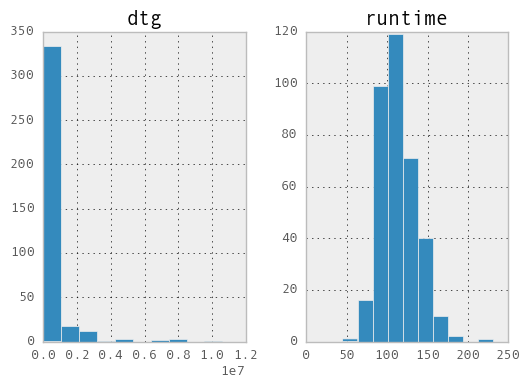

In [62]:
df_clean.groupby('mpaa').hist()

In [63]:
df_clean['date'] = pd.to_datetime(df.releasedate, format='%Y/%m/%d %H:%M:%S')

In [64]:
df_clean.columns

Index(['runtime', 'dtg', 'title', 'mpaa', 'releasedate', 'date'], dtype='object')

In [65]:
# df_clean.date[1].month in {6}

True

In [71]:
from bokeh.plotting import figure, show, output_file

colormap = {'R': 'red', 'PG-13': 'green', 'PG': 'blue'}
colors = [colormap[x] for x in df['mpaa']]

p = figure(title = "Worldwide Movie Releases")
p.xaxis.axis_label = 'Production Budget'
p.yaxis.axis_label = 'Domestic Total Gross'

p.circle(df["budget"], df["dtg"],
         color=colors, fill_alpha=0.2, size=10)

output_file("movies.html", title="luther example")

show(p)

INFO:bokeh.core.state:Session output file 'movies.html' already exists, will be overwritten.
